# Sediment Thickness
**Description:**  Sediment thickness grids from various sources.

**Datasets:** 

Tankersley, Matthew, Huw J. Horgan, Christine S. Smith Siddoway, Fabio Caratori Tontini, and Kirsty Tinto. “Basement Topography and Sediment Thickness beneath Antarctica’s Ross Ice Shelf Imaged with Airborne Magnetic Data.” PANGAEA, 2022. https://doi.org/10.1594/PANGAEA.941238.

Lindeque, Ansa, Karsten Gohl, Florian Wobbe, and Gabriele Uenzelmann-Neben. “Pre-Glacial to Glacial Sediment Thickness Grids for the Southern Pacific Margin of West Antarctica, NetCDF Files.” Supplement to: Lindeque, A et al. (2016): Preglacial to Glacial Sediment Thickness Grids for the Southern Pacific Margin of West Antarctica. Geochemistry, Geophysics, Geosystems, 17(10), 4276-4285, Https://Doi.Org/10.1002/2016GC006401. PANGAEA, 2016. https://doi.org/10.1594/PANGAEA.864906.

**Associated papers:** 

Baranov, A., A. Morelli, and A. Chuvaev. “ANTASed – An Updated Sediment Model for Antarctica.” Frontiers in Earth Science 9 (August 10, 2021): 722699. https://doi.org/10.3389/feart.2021.722699.

Tankersley, Matthew, Huw J. Horgan, Christine S. Siddoway, Fabio Caratori-Tontini, and K. J. Tinto. “Basement Topography and Sediment Thickness Beneath Antarctica’s Ross Ice Shelf.” Geophysical Research Letters 49, no. 10 (May 28, 2022). https://doi.org/10.1029/2021GL097371.

Lindeque, Ansa, Karsten Gohl, Florian Wobbe, and Gabriele Uenzelmann-Neben. “Preglacial to Glacial Sediment Thickness Grids for the Southern Pacific Margin of West Antarctica: Preglacial, Transitional and Full Glacial Isopach Maps, West Antarctica.” Geochemistry, Geophysics, Geosystems 17, no. 10 (2016): 4276–85. https://doi.org/10.1002/2016GC006401.

Straume, E. O., C. Gaina, S. Medvedev, K. Hochmuth, K. Gohl, J. M. Whittaker, R. Abdul Fattah, J. C. Doornenbal, and J. R. Hopper. “GlobSed: Updated Total Sediment Thickness in the World’s Oceans.” Geochemistry, Geophysics, Geosystems 20, no. 4 (April 2019): 1756–72. https://doi.org/10.1029/2018GC008115.


In [1]:
from __future__ import annotations

%%capture
%load_ext autoreload
%autoreload 2

from polartoolkit import fetch, maps, regions, utils

In [13]:
version_names = [
    "ANTASed",
    "tankersley-2022",
    "lindeque-2016",
    "GlobSed",
]

grids = []
for name in version_names:
    data = fetch.sediment_thickness(
        version=name,
        # available options
        # region,
        # spacing,
        # registration ("g" for gridline or "p" for pixel),
    )
    grids.append(data)
    print(f"Info for {name}")
    _ = utils.get_grid_info(data, print_info=True)
    print("##########")

Info for ANTASed
grid spacing: 10000.0 m
grid region: (-2350000.0, 2490000.0, -1990000.0, 2090000.0)
grid zmin: 0.0
grid zmax: 12730.0
grid registration: g
##########
Info for tankersley-2022
grid spacing: 5000.0 m
grid region: (-3330000.0, 1900000.0, -3330000.0, 1850000.0)
grid zmin: 0.0
grid zmax: 8002.51953125
grid registration: p
##########
Info for lindeque-2016
grid spacing: 5000.0 m
grid region: (-4600000.0, 1900000.0, -3900000.0, 1850000.0)
grid zmin: 0.0
grid zmax: 8042.0
grid registration: g
##########
Info for GlobSed
grid spacing: 1000.0 m
grid region: (-2799888.62136, 2801111.37864, -2800111.02329, 2800888.97671)
grid zmin: 0.0
grid zmax: 13999.9990234
grid registration: g
##########


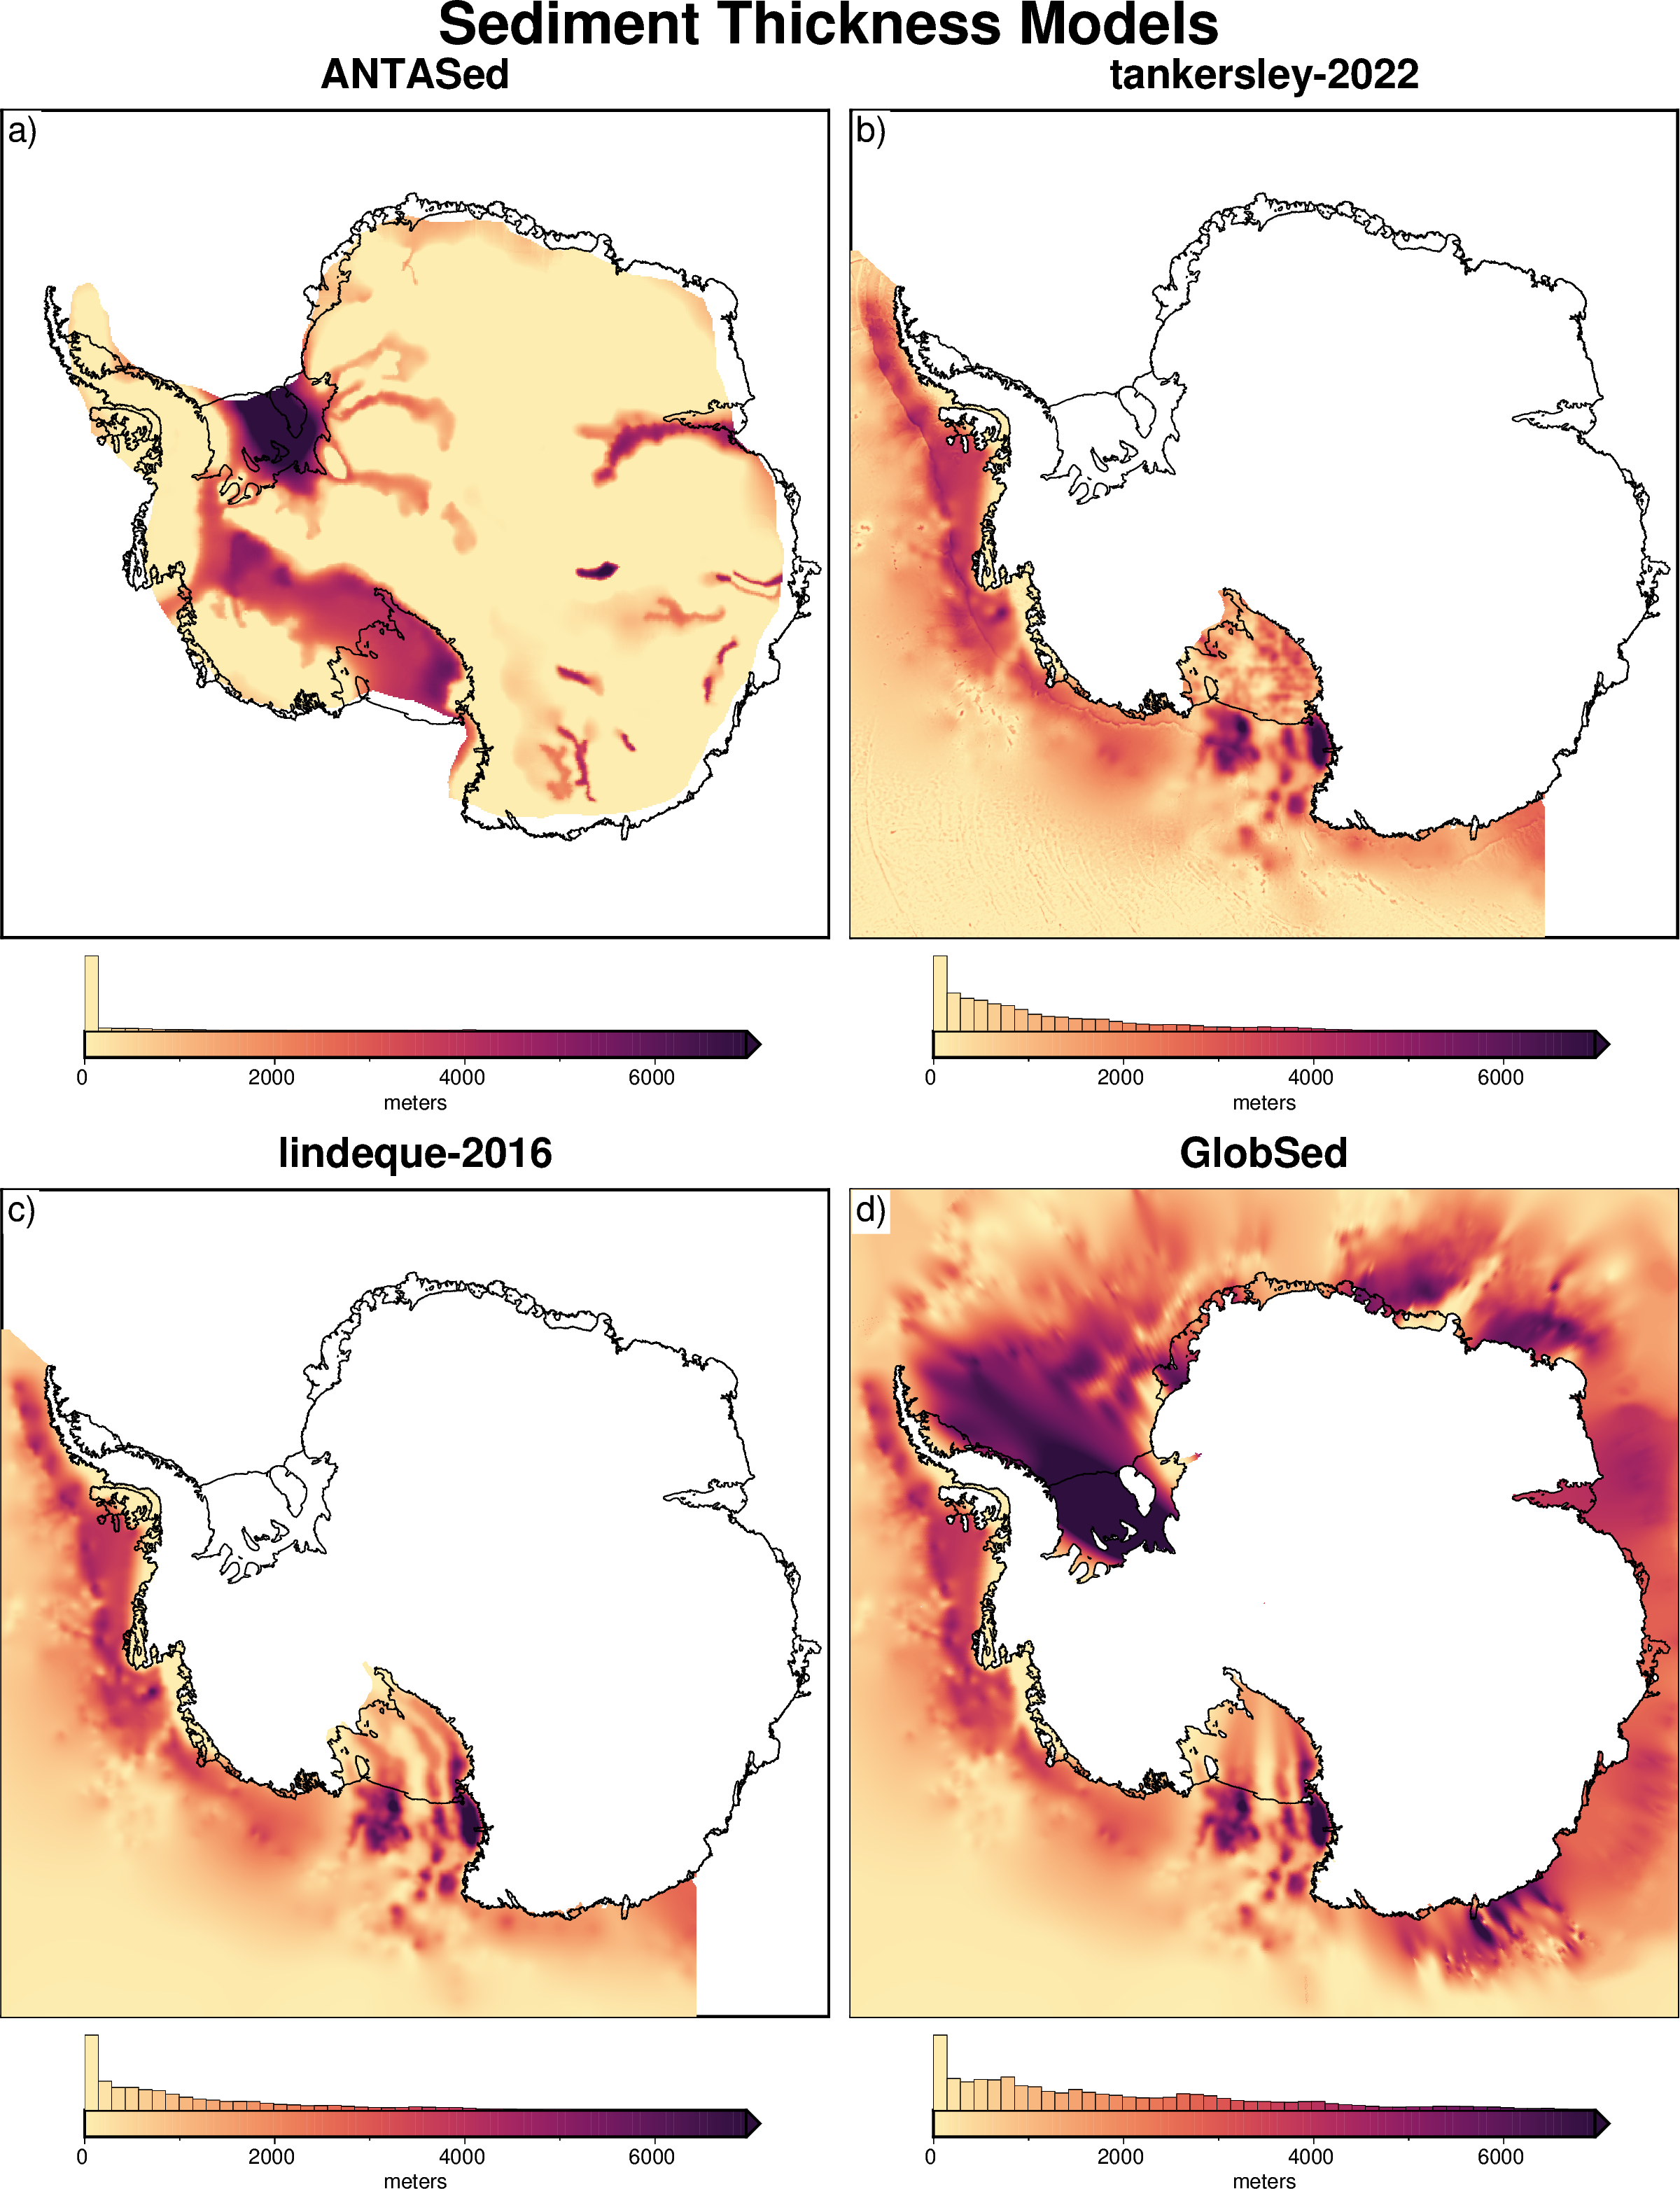

In [14]:
cpt_lims = utils.get_combined_min_max(grids, robust=True)

fig = maps.subplots(
    grids,
    region=regions.antarctica,
    fig_title="Sediment Thickness Models",
    subplot_titles=version_names,
    cbar_label="meters",
    margins=".5c/1.3c",
    coast=True,
    cmap="matter",
    cpt_lims=cpt_lims,
    hemisphere="south",
    hist=True,
)
fig.show(dpi=200)